In [34]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [37]:
X = np.array([2.4, 2.9, 3.2, 3.6, 4.1, 4.3, 5.1])
y = np.array([1.5, 1.85, 1.8, 1.9, 2.1, 2.05, 2.7])

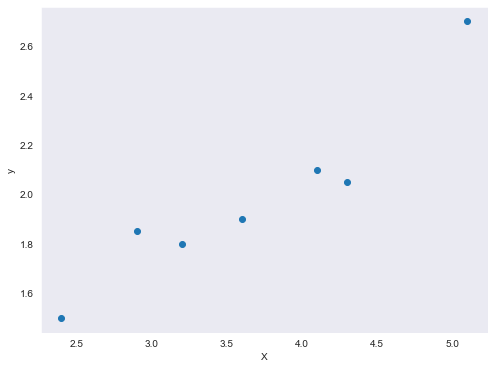

In [38]:

plt.figure(figsize=(8, 6))

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()

Среднеквадратическая ошибка: 0.6053749723459478 с перехватом: -1 и наклоном: 0.92
Среднеквадратическая ошибка: 0.4466107285513223 с перехватом: 2.5 и наклоном: -0.11
Среднеквадратическая ошибка: 0.16478210721174444 с перехватом: 0.1 и наклоном: 0.52


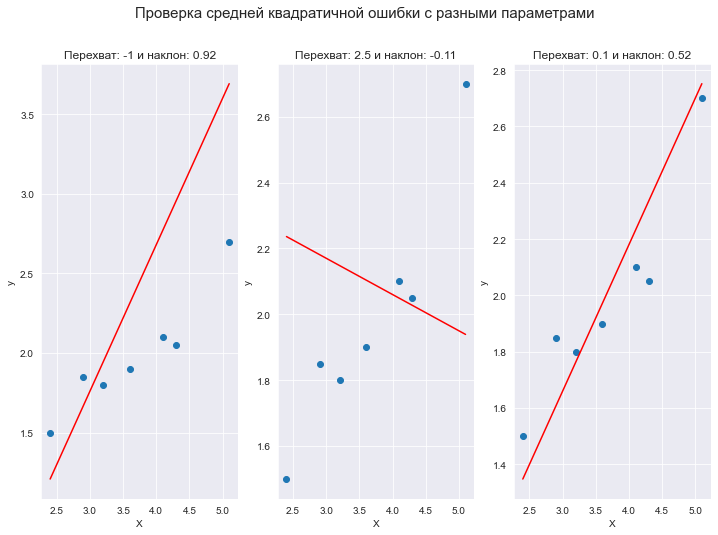

In [39]:
from sklearn.metrics import mean_squared_error
# Проверка средней квадратической ошибки в зависимости от параметров m и b
def rmse(y_act, y_pred):
    
    N = len(y_act)
    
    return (sum((y_pred - y_act)**2) / N) ** 0.5
    


m = [0.92, -0.11, 0.52]
b = [-1, 2.5, 0.1]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

#fig.ad

axs = [ax1, ax2, ax3]

#plt.figure(figsize=[15, 7])

fig.suptitle('Проверка средней квадратичной ошибки с разными параметрами', fontsize=15)
sns.set_style('darkgrid')
plt.grid(True)

#fig.xlabel('X')

for i in range(len(m)):
    
    curr_pred = np.array(X * m[i] + b[i])
    
    curr_rmse = rmse(y_act = y, y_pred = curr_pred)
    
    print(f"Среднеквадратическая ошибка: {curr_rmse} с перехватом: {b[i]} и наклоном: {m[i]}")
    
    axs[i].set_title(f'Перехват: {b[i]} и наклон: {m[i]}')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('y')
    axs[i].scatter(X, y)
    axs[i].plot(X, curr_pred, 'red')
    
plt.show()

MSE after 0th iteration: 3.083571428571428
Средняя абсолютная ошибка: 3.083571428571428 с перехватом: 0 и наклоном: 1


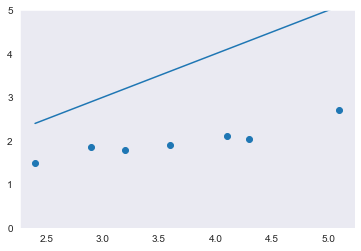

MSE after 1th iteration: 1.526337485191837
Средняя абсолютная ошибка: 1.526337485191837 с перехватом: -0.033428571428571426 и наклоном: 0.8688


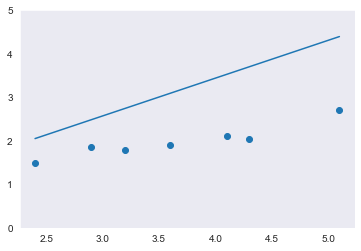

MSE after 2th iteration: 0.765408828515959
Средняя абсолютная ошибка: 0.765408828515959 с перехватом: -0.056592228571428566 и наклоном: 0.7770359640816327


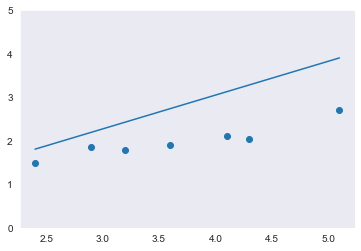

MSE after 3th iteration: 0.39357499725772804
Средняя абсолютная ошибка: 0.39357499725772804 с перехватом: -0.0725807288013994 и наклоном: 0.7128383986983557


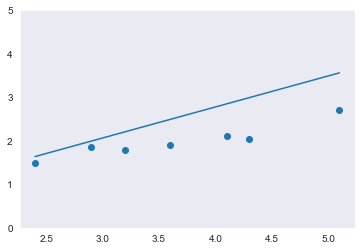

MSE after 4th iteration: 0.21186272511785972
Средняя абсолютная ошибка: 0.21186272511785972 с перехватом: -0.08355386567302257 и наклоном: 0.6679103229091046


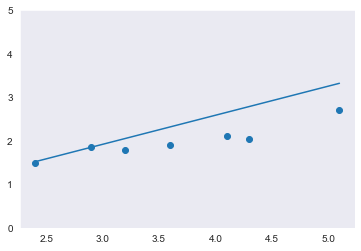

In [40]:
# initialize intercept
init_b = 0
    
# Initialize slope
init_m = 1

# Initialize learning rate
init_eta = 0.01
# Attenuation effect (Эффект затухания)
ae = 0.9

# Number of iterations
N = 5

# Option to pick MAE or MSE
cost_error = 'MSE'
# cost_error = 'MAE'

# Early stopping
# Difference between cost error on previous iteration and current one should be bigger than this number or learning will stop

for i in range(N):
    
    # Step 1: Calculate predicted values with current values of intercept and slope
    y_pred = np.array(init_b + (X * init_m))
    
    # Calculate current error
    if cost_error == 'MAE':
        curr_error = abs(y - y_pred)
    elif cost_error == 'MSE':
        curr_error = (y - y_pred) ** 2
        
    curr_mean_error = np.mean(curr_error)
    
    print(f"{cost_error} after {i}th iteration: {curr_mean_error}")
    
    print(f"Средняя абсолютная ошибка: {curr_mean_error} с перехватом: {init_b} и наклоном: {init_m}")
    
    plt.figure(figsize = (6,4))
    plt.scatter(X, y)
    
    plt.ylim(0, 5)
    
    plt.plot(X, y_pred)
    plt.grid()
    plt.show()
    
    # Step 2: Calculate gradients (derivative of cost function) with respect to intercept and slope 
    # grad_m = x(b + mx - y) / abs(b + mx - y) 
    # grad_m = - x (y - mx - b) / abs(y - mx - b)
    # grad_m = - x (err) / abs(err)
    # This will calculate gradient of function (way in function will ascent), we have to get anti gradient 
    # (where func will descent) to minimize error, so we remove negative sign from beginning of formula
    # grad_m = x * (err) / abs(err)
    
    if cost_error == 'MAE':
        grad_m = np.mean(((y - y_pred) / abs(y- y_pred)) * X)
    
        # Same steps for b 
        # grad_b = (b + mx - y) / abs(b + mx - y)
        # grad_b = err / abs(err)
        grad_b = np.mean((y - y_pred) / abs(y - y_pred))
    elif cost_error == 'MSE':
        # grad_m = -2x (-b - mx + y)
        # grad_m = -2x (y - mx - b)
        # grad_m = 2x (y -y_pred)
        grad_m = np.mean((y - y_pred) * 2 * X)
        
        # grad_b = -2 (-b -mx +y)
        # grad_b = - 2 (y - mx - b)
        # grad_b = 2 (y - y_pred)
        grad_b = np.mean((y - y_pred) * 2)

    
    # Step 3: Calculate updated intercept and slope with respect to our learning rate
    init_m = init_m + (grad_m * init_eta)
    init_b = init_b + (grad_b * init_eta)
    
    # Let's decrease learning rate a bit after 5th iteration
    #if i >= 5:
    #    init_eta = init_eta * ae
